In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
print(os.listdir("../working"))

import warnings
warnings.filterwarnings('ignore')
from fastai import *
from fastai.vision import *
import matplotlib
import re
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torchvision.models as models

['train.csv', 'test.csv', 'sample_submission.csv']
['.ipynb_checkpoints', '__notebook_source__.ipynb']
Populating the interactive namespace from numpy and matplotlib


In [95]:
train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [96]:
input_training_images = train_data.iloc[:,1:785].values

training_images = np.array([np.reshape(i, (28, 28)) for i in input_training_images])
training_labels = train_data.label

input_testing_images = test_data.iloc[:,0:785].values

testing_images = np.array([np.reshape(i, (28, 28)) for i in input_testing_images])

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)

(42000, 28, 28)
(42000,)
(28000, 28, 28)


In [97]:
training_images = training_images.reshape(42000, 1, 28, 28) / 255.
testing_images = testing_images.reshape(28000, 1, 28, 28) / 255.
print(training_images.shape)
print(testing_images.shape)

(42000, 1, 28, 28)
(28000, 1, 28, 28)


In [98]:
training_images_3 = np.concatenate([training_images, training_images, training_images], axis=1)
testing_images_3 = np.concatenate([testing_images, testing_images, testing_images], axis=1)

In [99]:
class ArrayImageList(ImageList):
    @classmethod
    def from_numpy(cls, numpy_array):
        return cls(items=range(len(numpy_array)),inner_df=numpy_array)
    
    def label_from_array(self, array, label_cls=None, **kwargs):
        return self._label_from_list(array[self.items.astype(np.int)],label_cls=label_cls,**kwargs)
    
    def get(self, i):
        n = self.inner_df[i]
        n = torch.tensor(n).float()
        return Image(n)

# 3 channels setup for ResNet 
data = (ArrayImageList.from_numpy(training_images_3) #taking the extra dimesional data
        .split_subsets(train_size=0.8, valid_size=0.2)
        .label_from_array(training_labels)
        .databunch(bs=10))

test_data = (ArrayImageList.from_numpy(testing_images_3)) #taking the extra dimesional data

# 1 channel setup for simple cnn
# data = (ArrayImageList.from_numpy(training_images)
#         .split_subsets(train_size=0.8, valid_size=0.2)
#         .label_from_array(training_labels)
#         .databunch(bs=10))

# test_data = (ArrayImageList.from_numpy(testing_images))

In [100]:
#show training data for simple cnn training
#data.show_batch(rows=3, figsize=(5,5))

In [101]:
print(data.classes)
len(data.classes),data.c

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(10, 10)

In [102]:
learn = create_cnn(data, models.resnet18, metrics=error_rate)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.759114,0.485745,0.142024,01:02


In [103]:
# model = simple_cnn((1,3,48,10))
# learn = Learner(data, model)
# learn.metrics=[accuracy]
# learn.fit(1)

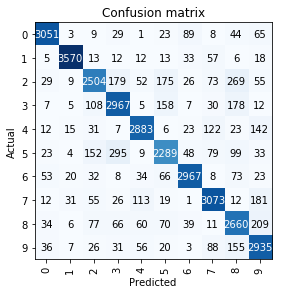

In [104]:
preds,y,losses = learn.get_preds(test_data, with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

In [105]:
interp.most_confused()

[(5, 3, 295),
 (2, 8, 269),
 (8, 9, 209),
 (7, 9, 181),
 (2, 3, 179),
 (3, 8, 178),
 (2, 5, 175),
 (3, 5, 158),
 (9, 8, 155),
 (5, 2, 152),
 (4, 9, 142),
 (4, 7, 122),
 (7, 4, 113),
 (3, 2, 108),
 (5, 8, 99),
 (0, 6, 89),
 (9, 7, 88),
 (5, 7, 79),
 (8, 2, 77),
 (2, 7, 73),
 (6, 8, 73),
 (8, 5, 70),
 (6, 5, 66),
 (8, 3, 66),
 (0, 9, 65),
 (8, 4, 60),
 (1, 7, 57),
 (9, 4, 56),
 (2, 9, 55),
 (7, 2, 55),
 (6, 0, 53),
 (2, 4, 52),
 (5, 6, 48),
 (0, 8, 44),
 (8, 6, 39),
 (9, 0, 36),
 (6, 4, 34),
 (8, 0, 34),
 (1, 6, 33),
 (5, 9, 33),
 (6, 2, 32),
 (4, 2, 31),
 (7, 1, 31),
 (9, 3, 31),
 (3, 7, 30),
 (0, 3, 29),
 (2, 0, 29),
 (2, 6, 26),
 (7, 3, 26),
 (9, 2, 26),
 (0, 5, 23),
 (4, 6, 23),
 (4, 8, 23),
 (5, 0, 23),
 (6, 9, 23),
 (6, 1, 20),
 (9, 5, 20),
 (7, 5, 19),
 (1, 9, 18),
 (4, 1, 15),
 (1, 2, 13),
 (1, 5, 13),
 (1, 3, 12),
 (1, 4, 12),
 (3, 9, 12),
 (4, 0, 12),
 (7, 0, 12),
 (7, 8, 12),
 (8, 7, 11),
 (0, 2, 9),
 (2, 1, 9),
 (5, 4, 9),
 (0, 7, 8),
 (6, 3, 8),
 (6, 7, 8),
 (3, 0, 7),
 (3, 

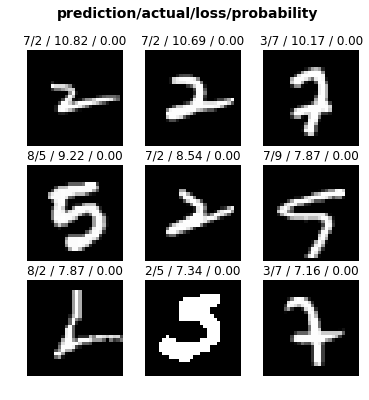

In [106]:
interp1 = ClassificationInterpretation.from_learner(learn)
interp1.plot_top_losses(9, figsize=(6,6))

In [107]:
# log_preds_test = learn.get_preds(test_data)
# len(log_preds_test[0])

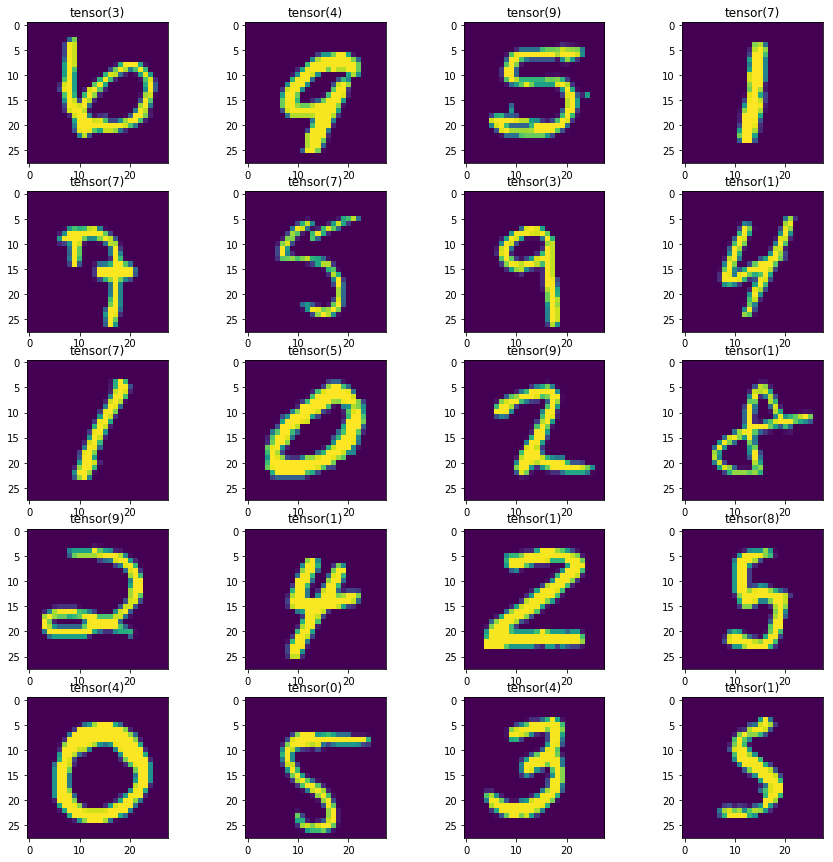

In [108]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    img_idx = random.randint(1,28000)
#    title = str(np.argmax(log_preds_test[0][img_idx]))
    title = str(np.argmax(preds[img_idx]))
    plt.title(title)
    plt.imshow(np.array([np.reshape(i, (28, 28)) for i in input_testing_images])[img_idx])
plt.show()

In [109]:
#CHANGE OUTPUT INTO Int32!!

# preds_test = np.argmax(log_preds_test[0], axis = 1)
# preds_test = pd.Series(preds_test,name="Label") 
# submission = pd.concat([pd.Series(range(1,28001), dtype = 'Int32', name = "ImageId"), preds_test],axis = 1)
# #submission.to_csv("submission.csv",index=False)
# sub_test = submission.iloc[:28000]
# sub_test.to_csv("submission.csv",index=False)